# Data Cleanup 
#### By Aaliyah Hänni, Vanessa Joy Hsu, Liem Luong, Dwight Sablan

Data Source: *Clothing Pattern Dataset* by Alexander J. Medeiros, Lee Stearns, Leah Findlater, Chuan Chen, and Jon E. Froehlich 
https://github.com/lstearns86/clothing-pattern-dataset

Pattern Types: 
 - Solid
 - Checkered
 - Floral
 - Dotted
 - Striped
 - Zig Zag
 
*Note: See Data Exploration notebook for how to install images locally*

The goal of this notebook is to:
1. center URL images using Crop X & Crop Y
2. crop URL images using Crop Width & Crop Height
3. create a dataframe of PNG locations and pattern type
4. resize all PNG images to 224 x 224 (to match cropped URLs)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib
from PIL import Image

import requests
from io import BytesIO

import glob, os, cv2

In [145]:
images = []
corrupted_images = []
for filename in glob.glob('*.jpg'): #enter local file path
    try:
        im = Image.open(filename)
        name = os.path.basename(filename)  
        images.append([name, im])
    except Exception:
        corrupted_images.append(filename)

    
print("Valid Images: ", len(images))
print("Corrupted Images: ", len(corrupted_images))

Valid Images:  1229
Corrupted Images:  32


In [146]:
images[0]

['01000__dotted.jpg',
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=500x373 at 0x27157E7E0A0>]

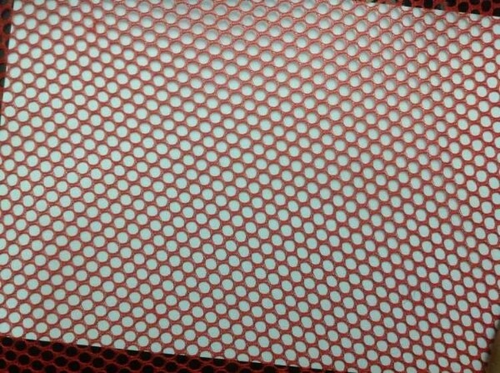

In [147]:
images[0][1]

In [150]:
images

[['01000__dotted.jpg',
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=500x373 at 0x27157E7E0A0>],
 ['01001__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x271009DAD60>],
 ['01002__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x450 at 0x27100BF6C70>],
 ['01003__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024 at 0x27100C246A0>],
 ['01004__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x2710120F7F0>],
 ['01005__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x533 at 0x27102092CD0>],
 ['01007__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=570x570 at 0x271009452E0>],
 ['01008__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=80x80 at 0x271008BDAC0>],
 ['01009__dotted.jpg',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1023x682 at 0x27159881A90>],
 ['0100__solid.jpg',
  <PIL.J

In [157]:
#split on '_' to separate image # and pattern
for i in range(len(images)):
    images[i][0] = images[i][0].split('_')

In [164]:
#convert string number to integer
for x in range(len(images)):
    images[x][0][0] = int(images[x][0][0])

In [167]:
images.sort()

In [168]:
images

[[[2, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x773 at 0x271039C2D60>],
 [[6, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=684x513 at 0x27103A85700>],
 [[11, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2710369EEB0>],
 [[14, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x708 at 0x27103723DC0>],
 [[16, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=423x488 at 0x2710377EA00>],
 [[20, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x27103837130>],
 [[21, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=432x467 at 0x2710385BAC0>],
 [[24, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x271038FDB20>],
 [[29, '', 'solid.jpg'],
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x271039C2D00>],
 [[32, 

In [6]:
cropping_details = pd.read_csv('googleClothingDataset.csv')
cropping_details.head()

,Class Name,URL,Original Width,Original Height,Crop X,Crop Y,Crop Width,Crop Height,Scales
0,solid,https://www.publicdomainpictures.net/pictures/...,1920,1280,0,0,1920,1280,0.2474874;0.4949747;0.9899495;1.979899
1,solid,https://c1.staticflickr.com/9/8208/8185035876_...,5456,3064,0,0,5456,3064,0.103389;0.206778;0.4135559;0.8271118;1.654224
2,solid,https://cdn.pixabay.com/photo/2017/08/14/22/24...,3680,2760,0,0,3680,2760,0.1147768;0.2295535;0.459107;0.918214;1.836428
3,solid,https://upload.wikimedia.org/wikipedia/commons...,2816,2112,0,0,2816,2112,0.1499923;0.2999847;0.5999694;1.199939
4,solid,https://c1.staticflickr.com/9/8753/17091052376...,2500,1668,0,0,2500,1668,0.1899184;0.3798367;0.7596735;1.519347


In [7]:
#note, that the X'th cropping_details image corresponds to the X+1 'th image in local storage, since the counter begins at 1.
#for example cropping_details[1] = images[0] (where # = 2)

In [173]:
cropping_details.URL[1]

'https://c1.staticflickr.com/9/8208/8185035876_2b056afb92_b.jpg'

In [185]:
images[0]

[[2, '', 'solid.jpg'],
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x773 at 0x271039C2D60>]

In [198]:
im = images[0][1]

In [202]:
#get original dimensions
width = cropping_details['Original Width'][1]
height = cropping_details['Original Height'][1]

#get center points
x = cropping_details['Crop X'][1]
y = cropping_details['Crop Y'][1]

#get cropping values
crop_width = cropping_details['Crop Width'][1]
crop_height = cropping_details['Crop Height'][1]

# setting the points for cropped image
left = width - (crop_width - x)
top = height - (crop_height + y)
right = width - (crop_width + x)
bottom = height - (crop_height - y)
 
# Cropped image of above dimension
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.show()

SystemError: tile cannot extend outside image

ValueError: Could not save to PNG for display

<PIL.Image.Image image mode=RGB size=0x0 at 0x271065906D0>

### Cited Sources 
https://www.geeksforgeeks.org/python-pil-image-crop-method/